What we are going to do:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
import matplotlib.pyplot as plt

## Getting the data

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

Grayscale image representation in computers.

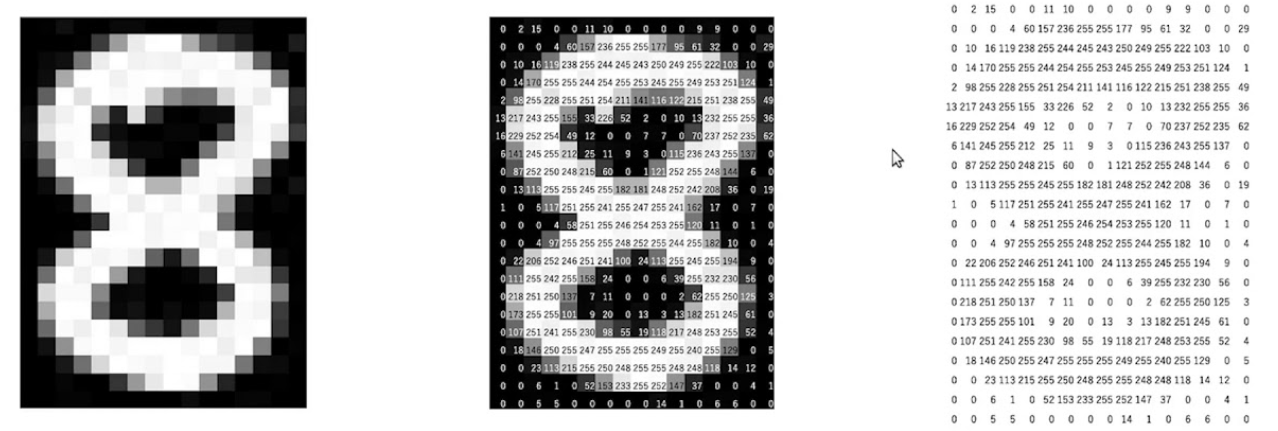

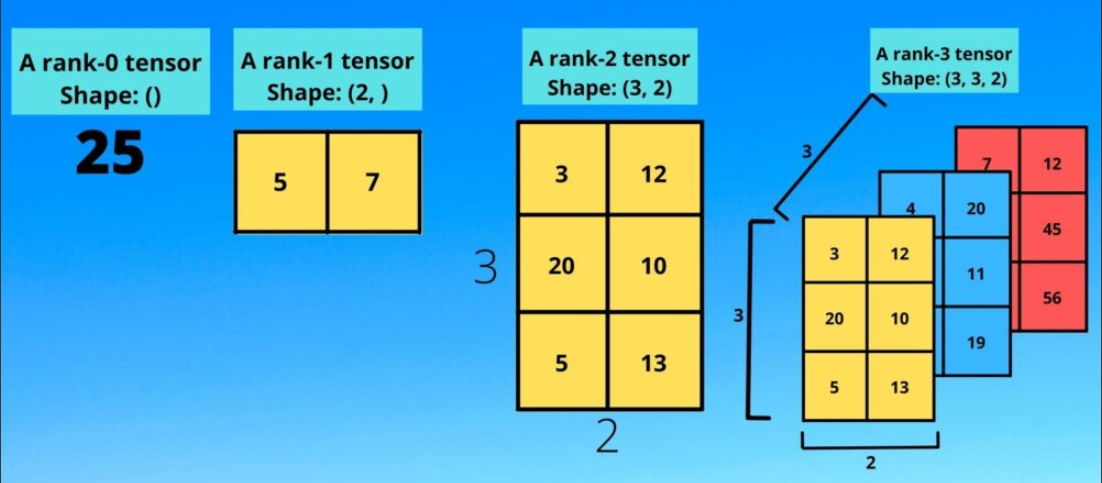

In [ ]:
len(x_train)

60000

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

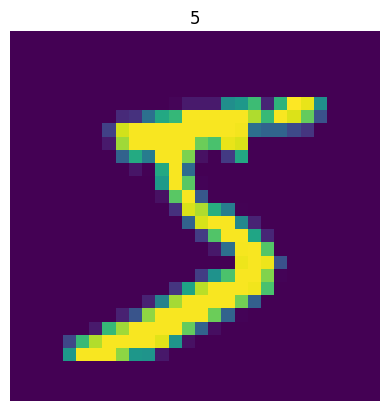

In [ ]:
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.axis(False)
plt.show()

 We now scale the input images which is on the range of 0-255 to the range 0-1 by dividing all image data by 255.0

Why is scaling important? Check out this [link](https://stats.stackexchange.com/questions/185853/why-do-we-need-to-normalize-the-images-before-we-put-them-into-cnn)


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model:

Our model will look like this:

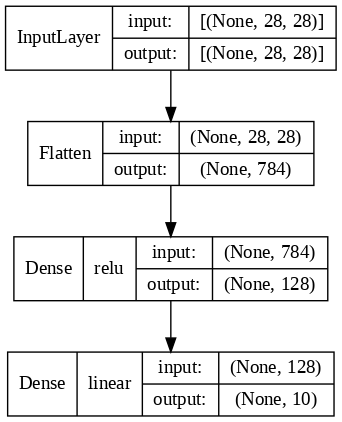

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.


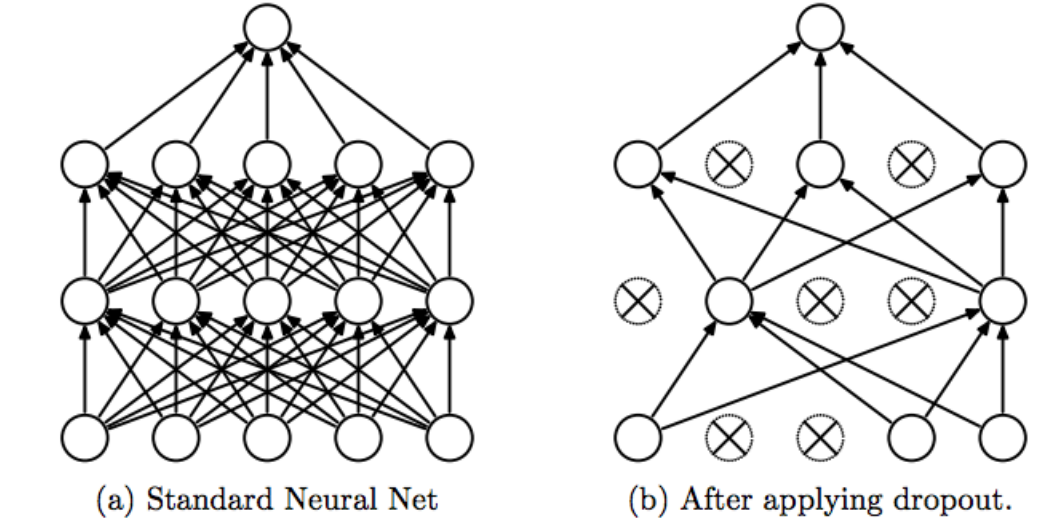

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.6221232 , -0.08047879,  0.5104383 ,  0.4057272 ,  0.17416303,
        -0.11072825, -1.099794  , -0.7013969 , -0.7869733 , -0.26514876]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

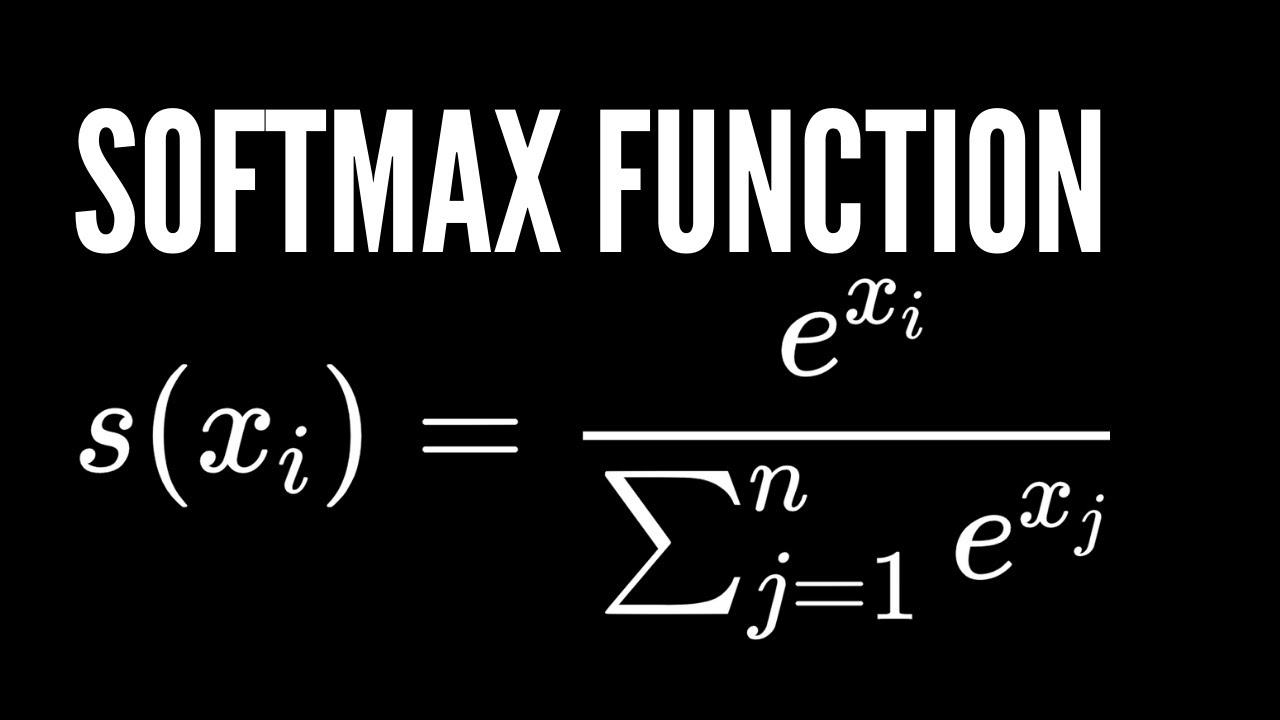


In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.18465291, 0.09145764, 0.1651399 , 0.14872247, 0.11798031,
        0.08873252, 0.03300176, 0.04915398, 0.04512252, 0.07603593]],
      dtype=float32)

In [ ]:
tf.one_hot(y_train[0], depth=10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

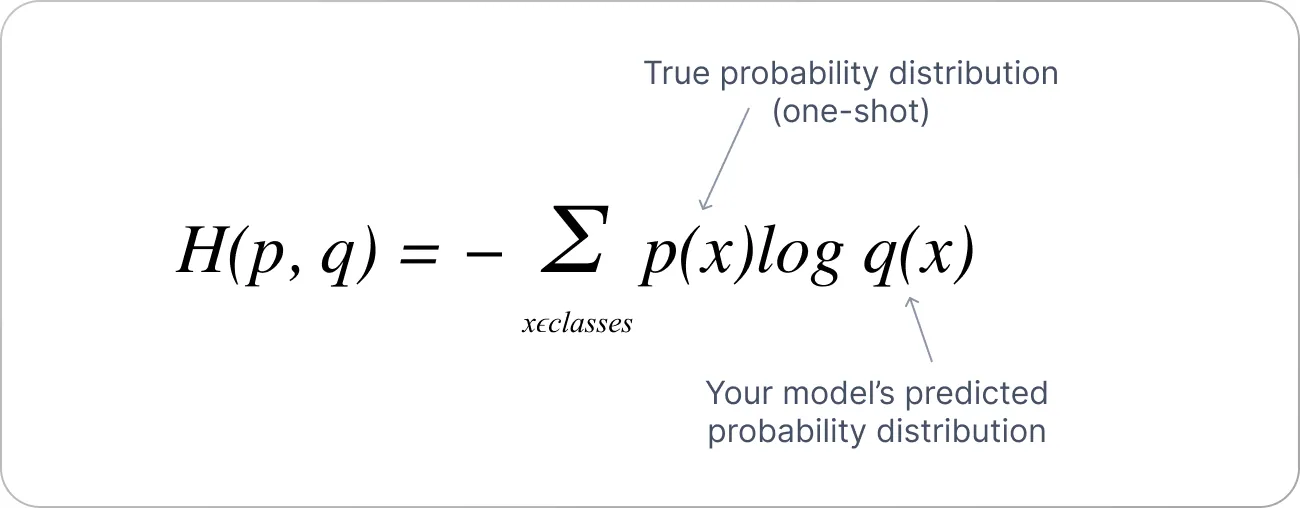

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.422129

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [ ]:
model.fit(x_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2998 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1432 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1059 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0754 - accuracy: 0.9762


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0703 - accuracy: 0.9776 - 953ms/epoch - 3ms/step


[0.07029450684785843, 0.9775999784469604]